# Dirty Data

In this world of big data, lot of data is collected and processed. But whatever data is collected how much of it is usable? Think about it, when every you are asked to fill a form do you always fill out the complete form? Do you fill it truthfully? What do you think will be the result of precessing data that has not been collected in the rightly.

For example:

"Add examples here, for dirty data here"
the data that we show here needs to have missing values. and noise.

1. #### What is Dirty data?

There are a few reasons for data to be dirty. 
Human Error
1. Inconsistant - eg: Mumbai, mumbai, mumbai. and so on
2. Duplicate data - Entering the same data multiple times
3. Incorrect data - entering the marks of a student in a perticular exam as NA, or AB to represent the person was absent
4. nonseensical data - It is data that does not obey bussniess rules. eg: not matching DOB and age. enter a number greater than 12 for month in DOB.   

Missing data: This is a very critical problem, because missing data is equvalant to missing insights. Data can be missing because of falty sensors, system faliure, unwiling ness of people to share data and so on. 

Fake data - Each one of us has a fake email which we give out on web sites. eg: abc@xyz.com 
We also give out fake data just to move on. eg: sales rep do you use a credic card. me: Yes i have one from your bank. This kind of data is misleading. 

2. #### Why do we need clean data

The most important job that a data scientists does is data cleaning. Folowing are the major reason for having clean data. 

1. It improves the predictability 
2. Some Machine learning algorithms do not work with missing data. 

### Solving the problem

Most of the issues with dairty data can be solved by simply maging better bussniess rules. 
eg: verify emails with otp, have drop downs and multiple chioise where every possible and so on. 

In the following demonstrations lets understand how to deal with missing data. 


# Initial setup

## Import required packages

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [28]:
data = pd.read_csv('Trail.csv', header = "infer")
#data.columns = ['Month','Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head(12)

,Passengers
Date,
1949-01-01,139.0
1949-02-01,99.0
1949-03-01,132.0
1949-04-01,154.0
1949-05-01,121.0
1949-06-01,115.0
1949-07-01,162.0
1949-08-01,181.0
1949-09-01,101.0


# Time series analysis

## Plot time series data

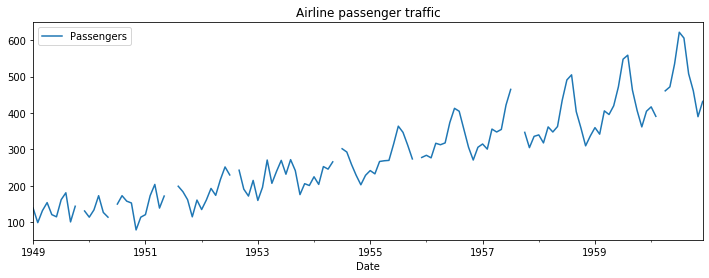

In [29]:
data.plot(y = 'Passengers', figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

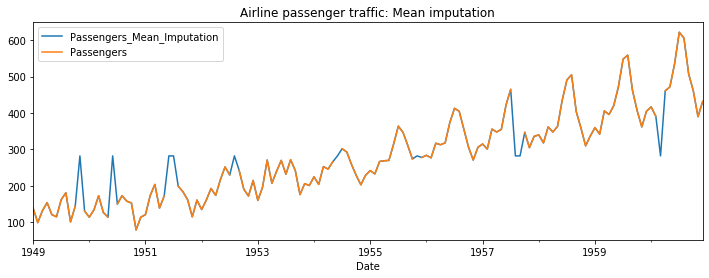

In [31]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation','Passengers']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

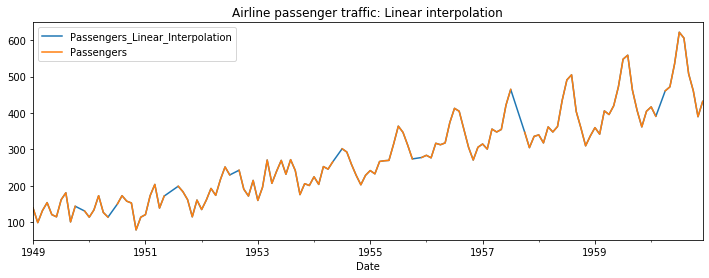

In [32]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation','Passengers']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [33]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Time series Decomposition

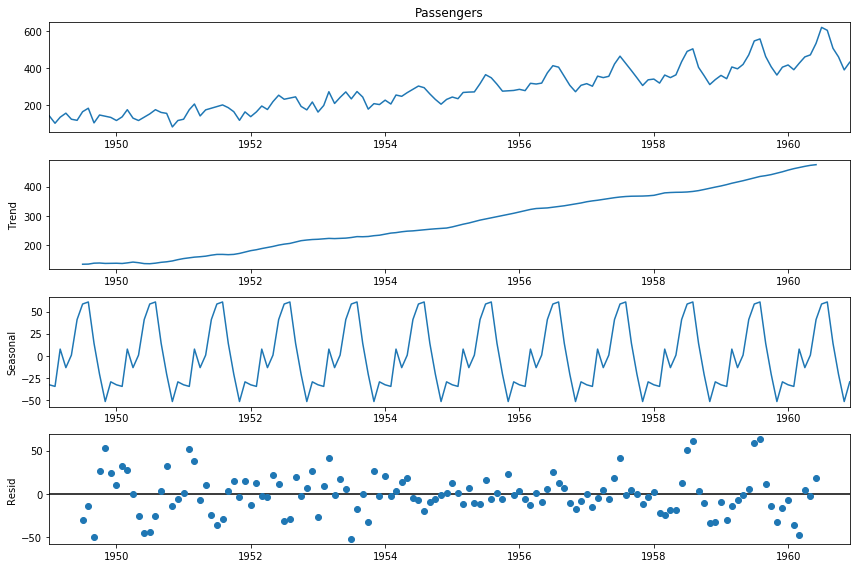

In [34]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()